<h3 id="Example:--Applying-Q-learning-to-the-gridworld-maze"><span style="color:#a50e3e;">Example.</span> &nbsp; Applying Q-learning to Gridworld<a class="anchor-link" href="#Example:--Applying-Q-learning-to-the-gridworld-maze">&#182;</a></h3>
<p>We can now use Q-Learning to train an agent for the small Gridworld maze we first saw in part 1.</p>


In [16]:
# import gridworld library - make sure this is executed prior to running any gridworld cell
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

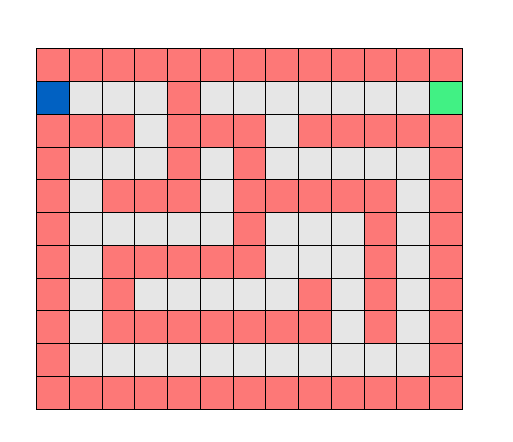

In [26]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_maze = gridworld_enviro.environment(world_size = 'small', world_type = 'maze',hazard_reward = -50)

# show the grid
small_maze.color_gridworld()

<p>In the next Python cell we train an agent for this Gridworld via the basic Q-Learning algorithm.</p>


In [27]:
# import q-learning module
from gridworld_lib import gridworld_qlearn

# create an instance of the q-learner
qlearner = gridworld_qlearn.learner(gridworld = small_maze)

# run q-learning
qlearner.train(verbose = True, action_method = 'exploit')

training episode 50 of 500 complete
training episode 100 of 500 complete
training episode 150 of 500 complete
training episode 200 of 500 complete
training episode 250 of 500 complete
training episode 300 of 500 complete
training episode 350 of 500 complete
training episode 400 of 500 complete
training episode 450 of 500 complete
training episode 500 of 500 complete
q-learning algorithm complete


<h3 id="Example:-back-to-the-gridworld-maze---using-the-optimal-policy-of-a-trained-agent"><span style="color:#a50e3e;"> Example. </span> &nbsp; Back to Gridworld: testing the agent<a class="anchor-link" href="#Example:-back-to-the-gridworld-maze---using-the-optimal-policy-of-a-trained-agent">&#182;</a></h3>
<p>
In the next Python cell we illustrate how to use the optimal policy with the Gridworld example, where we have already learned the proper $Q$ function in a previous Python cell. You can initialize the agent at any square on the board (except hazard locations in red), and activating the cell will animate its path.</p>


In [19]:
# # load in gridworld animation module
# from gridworld_lib import gridworld_animators

# # create instance of animator
# animator = gridworld_animators.animator()

# # animate a fully trained agent 
# locs = [[9,0]]
# animator.animate_validation_runs(gridworld = small_maze,learner = qlearner,starting_locations = locs)

In [20]:
import pandas as pd

# print out Q matrix
df = pd.DataFrame(qlearner.Q,columns=['down','up','left','right'], index=small_maze.states)
print df.round(3)   

       down    up  left  right
0,0   -60.0 -47.0 -60.0  -47.0
0,1   -47.0 -27.0 -57.0  -46.0
0,2   -39.0 -26.0 -47.0  -45.0
0,3   -43.0 -25.0 -46.0  -44.0
0,4   -44.0 -24.0 -45.0  -43.0
0,5   -43.0 -23.0 -44.0  -42.0
0,6   -42.0 -22.0 -43.0  -41.0
0,7   -41.0 -21.0 -42.0  -40.0
0,8   -40.0 -20.0 -41.0  -39.0
0,9   -39.0 -19.0 -40.0  -38.0
0,10  -38.0 -18.0 -39.0  -37.0
0,11  -37.0 -17.0 -38.0  -57.0
0,12  -57.0 -37.0 -37.0  -57.0
1,0   -67.0 -48.0 -47.0  -27.0
1,1   -47.0 -28.0 -47.0  -26.0
1,2   -46.0 -46.0 -27.0  -25.0
1,3   -45.0 -45.0 -26.0  -24.0
1,4   -44.0 -44.0 -25.0  -23.0
1,5   -43.0 -43.0 -24.0  -22.0
1,6   -42.0 -42.0 -23.0  -21.0
1,7   -41.0 -41.0 -22.0  -20.0
1,8   -40.0 -40.0 -21.0  -19.0
1,9   -39.0 -20.0 -20.0  -18.0
1,10  -38.0 -36.0 -19.0  -17.0
1,11  -37.0 -16.0 -18.0  -37.0
1,12  -57.0 -36.0 -17.0  -37.0
2,0   -45.0 -49.0 -48.0  -28.0
2,1   -27.0 -29.0 -48.0  -46.0
2,2   -26.0 -49.0 -28.0  -45.0
2,3   -25.0 -29.0 -46.0  -44.0
...     ...   ...   ...    ...
8,9    -

In [28]:
# get best direction per row
import numpy as np
Q = qlearner.Q
best_actions = np.argmax(Q,axis = 1)
best_Q_vals = np.max(Q,axis=1)

In [29]:
# prep states as coordinates for plotting
states = small_maze.states
x = []
y = []
for i in range(len(states)):
    a = states[i]
    b = a.split(',')
    x.append(int(b[0]))
    y.append(int(b[1]))

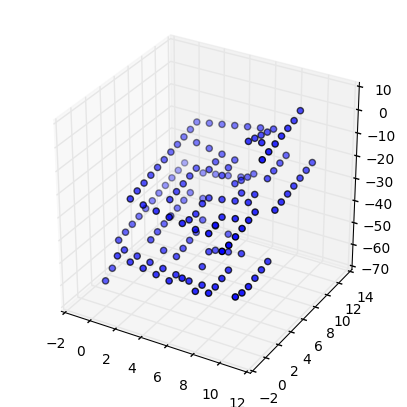

In [23]:
# plot 3d scatter
# %matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# produce figure
fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection = '3d')
        
# ax.scatter(x,y,best_Q_vals)
ax.scatter(x,y,Q[:,2])
plt.show()

In [30]:
### setup arrows
def add_arrows(ax,state,action):
    x = state[1]
    y = state[0]
    dx = 0
    dy = 0

    ### switch for starting point of arrow depending on action - so that arrow always centered ###
    if action == 0:    # action == down
        y += 0.9
        x += 0.5
        dy = -0.8
    if action == 1:    # action == up
        x += 0.5
        y += 0.1
        dy = 0.8
    if action == 2:    # action == left
        y += 0.5
        x += 0.9
        dx = -0.8
    if action == 3:    # action == right
        y += 0.5
        x += 0.1
        dx = 0.8

    ### add patch with location / orientation determined by action ###
    ax.add_patch(
       patches.FancyArrowPatch(
       (x, y),
       (x+dx, y+dy),
       arrowstyle='->',
       mutation_scale=30,
       lw=2
       )
    )

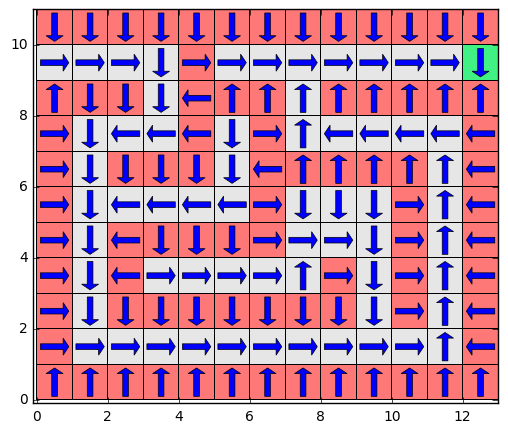

In [31]:
# plot gridworld with arros
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

### setup colormap
colors = [(0.9,0.9,0.9),(255/float(255), 119/float(255), 119/float(255)), (66/float(255),244/float(255),131/float(255)), (1/float(255),100/float(255),200/float(255)),(0,0,0)]  
my_cmap = LinearSegmentedColormap.from_list('colormapX', colors, N=100)

### setup grid
p_grid = small_maze.grid
p_grid[small_maze.goal[0]][small_maze.goal[1]] = 2   


### setup plot
fsize = 6
fig = plt.figure(figsize = (fsize,fsize),frameon=False)
ax = fig.add_subplot(111, aspect='equal')
            
ax.pcolormesh(p_grid,edgecolors = 'k',linewidth = 0.01,vmin=0,vmax=4,cmap = my_cmap)

# clean up plot
ax.set_xlim(-0.1,small_maze.width );
ax.set_ylim(-0.1,small_maze.height); 

### go over states and draw arrows indicating best action
# for i in range(len(states)):
for i in range(len(best_actions)):
    a = states[i]
    b = a.split(',')
    state = [int(b[0])]
    state.append(int(b[1]))
    action = best_actions[i]
    add_arrows(ax,state,action)

plt.show()

In [1]:
# import gridworld library - make sure this is executed prior to running any gridworld cell
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

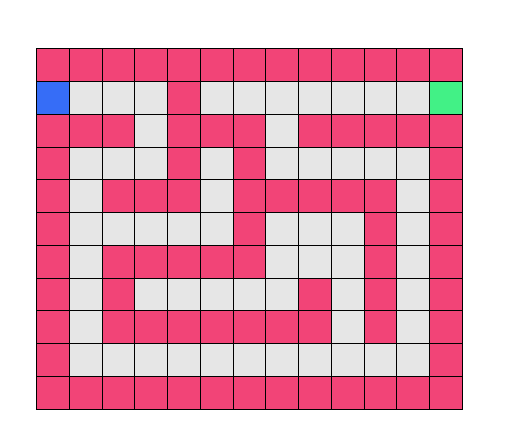

In [2]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro_func_approx

# generate instance of gridworld
small_maze = gridworld_enviro_func_approx.environment(world_size = 'small', world_type = 'maze',hazard_reward = -50)

# show the grid
small_maze.color_gridworld()

In [12]:
# import q-learning module
from gridworld_lib import gridworld_qlearn_func_approx

# create an instance of the q-learner
qlearner = gridworld_qlearn_func_approx.learner(gridworld = small_maze,degree = 5)

# run q-learning
qlearner.train(verbose = True, action_method = 'exploit')

training episode 50 of 500 complete
training episode 100 of 500 complete
training episode 150 of 500 complete
training episode 200 of 500 complete
training episode 250 of 500 complete
training episode 300 of 500 complete
training episode 350 of 500 complete
training episode 400 of 500 complete
training episode 450 of 500 complete
training episode 500 of 500 complete
q-learning algorithm complete


In [13]:
# prep states as coordinates for plotting
import numpy as np
states = small_maze.states
x = []
y = []
best_actions = []
for i in range(len(states)):
    a = states[i]
    b = a.split(',')
    x.append(int(b[0]))
    y.append(int(b[1]))
    state = [x[-1],y[-1]]
    scores = qlearner.evaluate_h(state)
    ind = np.argmax(scores)
    best_actions.append(ind)

In [34]:
### setup arrows
def add_arrows(ax,state,action):
    x = state[1]
    y = state[0]
    dx = 0
    dy = 0

    ### switch for starting point of arrow depending on action - so that arrow always centered ###
    if action == 0:    # action == down
        y += 0.9
        x += 0.5
        dy = -0.8
    if action == 1:    # action == up
        x += 0.5
        y += 0.1
        dy = 0.8
    if action == 2:    # action == left
        y += 0.5
        x += 0.9
        dx = -0.8
    if action == 3:    # action == right
        y += 0.5
        x += 0.1
        dx = 0.8

    ### add patch with location / orientation determined by action ###
    ax.add_patch(
       patches.FancyArrowPatch(
       (x, y),
       (x+dx, y+dy),
       arrowstyle='->',
       mutation_scale=30,
       lw=2
       )
    )

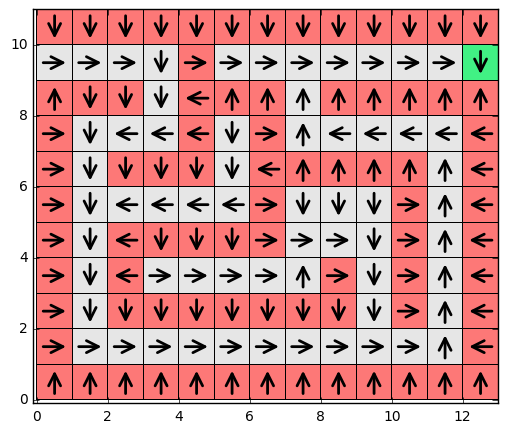

In [35]:
# plot gridworld with arros
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

### setup colormap
colors = [(0.9,0.9,0.9),(255/float(255), 119/float(255), 119/float(255)), (66/float(255),244/float(255),131/float(255)), (1/float(255),100/float(255),200/float(255)),(0,0,0)]  
my_cmap = LinearSegmentedColormap.from_list('colormapX', colors, N=100)

### setup grid
p_grid = small_maze.grid
p_grid[small_maze.goal[0]][small_maze.goal[1]] = 2   


### setup plot
fsize = 6
fig = plt.figure(figsize = (fsize,fsize),frameon=False)
ax = fig.add_subplot(111, aspect='equal')
            
ax.pcolormesh(p_grid,edgecolors = 'k',linewidth = 0.01,vmin=0,vmax=4,cmap = my_cmap)

# clean up plot
ax.set_xlim(-0.1,small_maze.width );
ax.set_ylim(-0.1,small_maze.height); 

### go over states and draw arrows indicating best action
# for i in range(len(states)):
for i in range(len(best_actions)):
    a = states[i]
    b = a.split(',')
    state = [int(b[0])]
    state.append(int(b[1]))
    action = best_actions[i]
    add_arrows(ax,state,action)

plt.show()